In [114]:
from __future__ import annotations
from astropy.table import QTable
from astropy.visualization import quantity_support
import matplotlib.path as mpath
import numpy.lib.recfunctions as rfn

import matplotlib.pyplot as plt
import numpy as np

In [302]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7ffa6782c130>

In [303]:
table = QTable.read("joined-GD-1.fits")
table.colnames

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'ruwe',
 'astrometric_matched_transits',
 'phi1',
 'phi2',
 'pm_phi1_cosphi2',
 'pm_phi1_cosphi2_unrefl',
 'pm_phi2',
 'pm_phi2_unrefl',
 'star_mask',
 'g0',
 'r0',
 'i0',
 'z0',
 'y0']

In [304]:
print(table.colnames)

['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_bp_mean_flux_over_error', 'phot_rp_mean_mag', 'phot_rp_mean_flux_over_error', 'ruwe', 'astrometric_matched_transits', 'phi1', 'phi2', 'pm_phi1_cosphi2', 'pm_phi1_cosphi2_unrefl', 'pm_phi2', 'pm_phi2_unrefl', 'star_mask', 'g0', 'r0', 'i0', 'z0', 'y0']


In [305]:
pm_vertices = np.array([[-15, -5], [-15, -3], [-12, -3], [-12, -5]])
path = mpath.Path(pm_vertices)

In [306]:
sel_data = path.contains_points(np.c_[table["pm_phi1_cosphi2_unrefl"], table["pm_phi2_unrefl"]])
good = (table['g0']>-30) & (table['r0']>-30)
sel_data = sel_data & good 

In [307]:
sel_data.sum()

11371

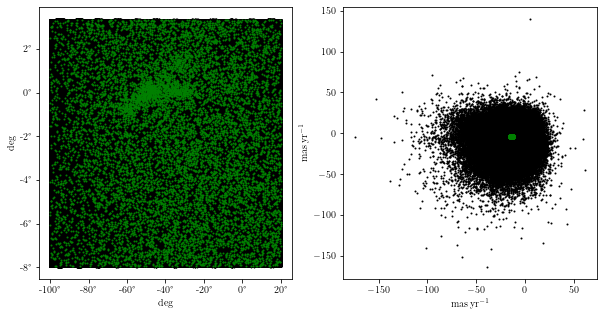

In [308]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(table["phi1"], table["phi2"], s=1, rasterized=True, c="k")
axs[0].scatter(table["phi1"][sel_data], table["phi2"][sel_data], s=1, c="green", rasterized=True)


axs[1].scatter(table["pm_phi1_cosphi2_unrefl"], table["pm_phi2_unrefl"], s=1, rasterized=True, c="k")
axs[1].scatter(table["pm_phi1_cosphi2_unrefl"][sel_data], table["pm_phi2_unrefl"][sel_data], s=10, c="green", rasterized=True)
# axs[1].scatter(*pm_vertices.T)

In [309]:
#table['phot']
#bp_rp = table["phot_bp_mean_mag"]-table["phot_rp_mean_mag"]
table.keys()

['source_id',
 'ra',
 'dec',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_g_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_mean_flux_over_error',
 'ruwe',
 'astrometric_matched_transits',
 'phi1',
 'phi2',
 'pm_phi1_cosphi2',
 'pm_phi1_cosphi2_unrefl',
 'pm_phi2',
 'pm_phi2_unrefl',
 'star_mask',
 'g0',
 'r0',
 'i0',
 'z0',
 'y0']

In [319]:
table["g0-r0"]=table["g0"]-table["r0"]

In [320]:
data = rfn.structured_to_unstructured(np.array(table[["phi1", "phi2", "parallax", "pm_phi1_cosphi2_unrefl", "pm_phi2_unrefl",
                                                      "g0","g0-r0"]][sel_data]))

# rescaling
for i in range(data.shape[1]):
    data[:, i] = (data[:, i] - np.nanmean(data[:, i])) / np.nanstd(data[:, i])
    
# missing data
data[table["parallax"][sel_data] <= 0, 2] = np.nan

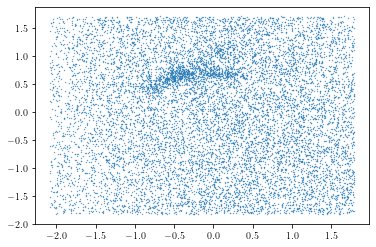

In [321]:
plt.scatter(data[:,0],data[:,1],s=.1)
off_stream_bool = data[:,1] < -0.5

In [322]:
  
def scaled_g_r_func(g,params):
    """
    Polynomial is of the form (g'-r')(g') = ag'^3 + bg'^2 + cg' + d
    """
    a,b,c,d = params
    return a*(g**3) + b*(g**2) + c*g + d



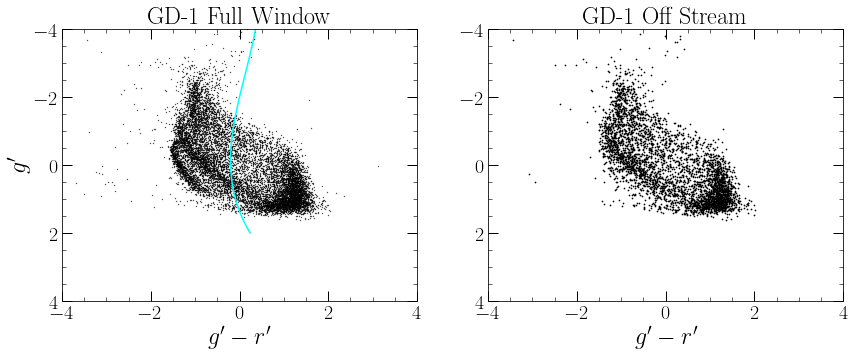

In [323]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,5)
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


# matplotlib ticks
for i in range(2):
    ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax[i].minorticks_on() #Minor
    ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor


ax[0].scatter(data[:,-1],data[:,-2],rasterized=True,s=.1,color='k')
ax[0].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
#ax[0].set_xlim(-1,1)
ax[0].set_title('GD-1 Full Window',fontsize=24)

ax[1].scatter(data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.5,color='k')
ax[1].set_xlabel(r'$g^\prime-r^\prime$',fontsize=24)
#ax[0].set_ylabel(r'$g^\prime$',fontsize=24)
ax[1].set_xlim(-1,1)
ax[1].set_title('GD-1 Off Stream',fontsize=24)





cmd_params = np.array([.01,.08,.02,-.2])
g_inp = np.linspace(-4,2,100)
g_minus_r_prime_model = scaled_g_r_func(g_inp,cmd_params)

ax[0].plot(g_minus_r_prime_model,g_inp,color='cyan',label='Test Input')


for i in range(2):
    ax[i].set_xlim(-4,4)
    ax[i].set_ylim(-4,4)
    ax[i].invert_yaxis()
    

In [324]:
g_prime_minus_r_prime_off = data[off_stream_bool,-2]-data[off_stream_bool,-1]
g_prime_off = data[off_stream_bool,-2]
CMD_torch = torch.tensor(np.vstack([g_prime_minus_r_prime_off,g_prime_off]).T).float()
CMD_torch.shape

torch.Size([3925, 2])

In [325]:
import torch
from torch import nn
from torch import optim

from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation

In [326]:
num_layers = 5
base_dist = StandardNormal(shape=[2])

transforms = []
for _ in range(num_layers):
    transforms.append(ReversePermutation(features=2))
    transforms.append(MaskedAffineAutoregressiveTransform(features=2, 
                                                          hidden_features=16))
transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
optimizer = optim.Adam(flow.parameters())



BATCH_SIZE = 50
torch_dataset = Data.TensorDataset(CMD_torch) #g_theta_dxdt_obs
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)



In [327]:


BATCH_SIZE = 50
torch_dataset = Data.TensorDataset(CMD_torch) #g_theta_dxdt_obs
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)



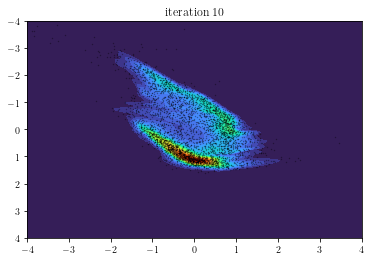

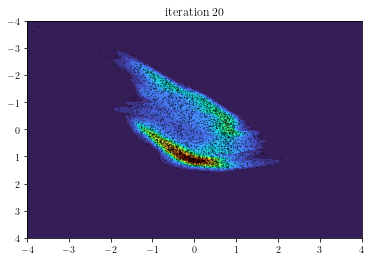

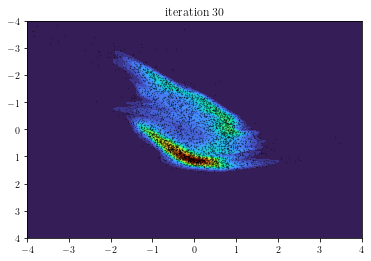

KeyboardInterrupt: 

In [333]:
EPOCH = 5000
for g in optimizer.param_groups:
    g['lr'] = 1e-4

for epoch in range(EPOCH):
    for step, cmd in enumerate(loader):
        optimizer.zero_grad()
        loss = -flow.log_prob(inputs=cmd[0]).mean()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        xline = torch.linspace(-4., 4.,200)
        yline = torch.linspace(-4, 4.,201)
        xgrid, ygrid = torch.meshgrid(xline, yline)
        xyinput = torch.cat([xgrid.reshape(-1, 1), ygrid.reshape(-1, 1)], dim=1)

        with torch.no_grad():
            zgrid = flow.log_prob(xyinput).exp().reshape(len(xline), len(yline))

        plt.contourf(xgrid.numpy(), ygrid.numpy(), zgrid.numpy(),cmap=plt.get_cmap('turbo'),levels=30)
        plt.title('iteration {}'.format(epoch + 1))
        plt.scatter(data[off_stream_bool,-2]-data[off_stream_bool,-1],data[off_stream_bool,-2],rasterized=True,s=.1,color='k',alpha=.5)
        plt.xlim(-4,4)
        plt.ylim(-4,4)
        plt.gca().invert_yaxis()
        plt.show()


## ML

In [334]:
g_mag = data

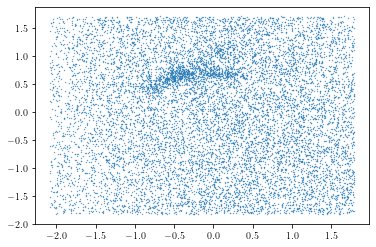

In [335]:
plt.scatter(data[:,0],data[:,1],s=.1)

In [16]:
# https://nbviewer.jupyter.org/github/tingyuansen/deep-potential/blob/master/notebooks/plummer_sphere_example.ipynb
#import sys
#sys.path.append('/global/u2/j/jnibauer/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages')
import torch
from torch.autograd import Variable
print(f'Pytorch version {torch.__version__}')
import numpy as np
#import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch.nn as nn
import torch.utils.data as Data
#import matplotlib.colors as mcolors
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator
#from matplotlib.gridspec import GridSpec
#import astropy.units as u
#from time import time
#import re
#import json
#import toy_systems
#import agama
from matplotlib import rc

#from nflows.flows.base import Flow
#from nflows.distributions.normal import StandardNormal
#from nflows.transforms.base import CompositeTransform
#from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
#from nflows.transforms.permutations import ReversePermutation

import torch.nn as nn
import torch.utils.data as Data
from tqdm.notebook import tqdm
from matplotlib import patches
import torch.nn as nn
import torch.utils.data as Data
from scipy.stats import norm

Pytorch version 1.13.0


In [27]:
rand_mask = np.isnan(data[:,1:]) #TRUE WHERE MASKED
data_torch = torch.tensor(data).float()
data_torch[torch.isnan(data_torch)] = torch.tensor([0.]).float()


#data_torch = torch.tensor(data).float()
#data_torch[torch.isnan(data_torch)] = torch.tensor([0.]).float()
#cov_avail = torch.zeros(len(data_torch),5,5).float() #inf where masked, 0 otherwise
#rand_mask_5d = rand_mask[:,1:] # n_star x 5
#for i in range(len(cov_avail)):
#    mask_column_bool = rand_mask_5d[i,:] # length of 5
#    cov_avail[i,mask_column_bool,mask_column_bool] = torch.inf
    
cov_avail = torch.zeros(len(data_torch),4).float() #inf where masked, 0 otherwise
rand_mask_4d = rand_mask[:,:] # n_star x 5
for i in range(len(cov_avail)):
    mask_column_bool = rand_mask_4d[i,:] # length of 5
    cov_avail[i,mask_column_bool] = True#true where masked
    
cov_avail = cov_avail==0 # !!!!!!!!!!will be true where NOT MASKED!!!!!!!!!!!
BATCH_SIZE = 1500 #10 #50#5000#128 #Number of sampling locations to feed in at any point
EPOCH = 5000
#cov_avail.requires_grad = True


torch_dataset = Data.TensorDataset(data_torch[:,0].view(-1,1),data_torch[:,1:],cov_avail)
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)


def neg_log_like(phi1,data_vector,cov_predict, cov_avail,f,mu_predict,mu_min,mu_max): #-2,2
    """
    shape(phi1) = n_star x 1
    shape(data_vector) = n_star x 5 with zeros where there is missing data
    shape(cov_predict) = nstar x 5 x 5: sigma for each phase space dimension (diagonal matrix)
    shape(cov_avail) = nstar x 5 x 5: diagonal matrix of zeros and infs for each star. Infs where there is no data
    shape(f) = n_star x 1
    shape(mu_predict) = n_star x 5
    shap(mu_min) = 5 x 1: min value for data in each phase space dim.
    shape(mu_max) = 5 x 1: max value for data in each phase space dim.
    """
    cov_total = cov_predict ##+ cov_avail 
    inv_cov_total = torch.inverse(cov_total) # nstar x 5 x 5
    data_minus_model = data_vector - mu_predict # n_star x 5
    right_product = torch.einsum('ijk,ik->ij',inv_cov_total,data_minus_model) # n_star x 5
    right_product[~cov_avail] = torch.tensor([0.]).float()
    exp_arg = -0.5*torch.sum(data_minus_model*right_product,dim=1)  # n_star
    det_arr = torch.zeros(len(cov_total))
    for i in range(len(det_arr)):
        det_arr[i] = torch.prod(cov_total[i,cov_avail[i,:],cov_avail[i,:]])
    ####print(cov_total.shape,cov_avail.shape)
    
    #gaussian_prefac = torch.sqrt( ( (2.0*torch.pi)**5. )*torch.det(cov_total) ) # n_star
    gaussian_prefac = torch.sqrt( ( (2.0*torch.pi)**5. )*det_arr ) # n_star
    log_stream_comp = torch.log(f.flatten()) - torch.log(gaussian_prefac) + exp_arg # n_star
    unif_normalization = torch.prod(mu_max - mu_min)
    log_uniform_comp = torch.log(1.-f) - torch.log(unif_normalization)
    log_like_arr = torch.log( torch.exp(log_stream_comp) + torch.exp(log_uniform_comp) )
    log_like = torch.sum(log_like_arr)
    #print(log_like)
    return -log_like    
    
class Net(nn.Module):
    def __init__(self,bool_mask=None):
        super().__init__() #Initializes methods from nn.Module, which is necessary to use all of the functions that we want:https://www.educative.io/edpresso/what-is-super-in-python
        self.fc1 = nn.Linear(1,64) #So first layer has 1 node, second has 10
        self.fc2 = nn.Linear(64,64) #second has 10 nodes, third has 10
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,9) # (d1, d2, d3, d4, sig1, sig2, sig3, sig4, f)
        #self.bool_mask = bool_mask #either none or boolean mask array shape: neval x 5
        #self.fc4 = nn.Linear(500,1)
        #self.dropout = nn.Dropout(0.4)#.1
        
    def forward(self,x): #feed data forward
        x = torch.tanh(self.fc1(x))#,dim=1)       
        x = torch.tanh(self.fc2(x))#,dim=1)
        x = torch.tanh(self.fc3(x))#,dim=1)
        out = self.fc4(x) 
        
        mean_phase_space = out[:,:4]
        sigma_phase_space = torch.sigmoid(out[:,4:8])*.5 #.3
        f = torch.sigmoid(out[:,-1])*.45
        #if self.bool_mask == None:
        return mean_phase_space, sigma_phase_space,f.view(-1,1)
        #else:
        #    sigma_phase_space[self.bool_mask] = torch.tensor([100000000000.]).float()#torch.inf
        #    return mean_phase_space, sigma_phase_space,f.view(-1,1)
net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3,weight_decay=1e-10)#,weight_decay=1e-8)#,weight_decay=1e-4)#,weight_decay=1e-8)#1e-3
phi_test = torch.linspace(-1,1,100).view(-1,1)
mean_phase_space, sigma_phase_space,f = net(phi_test)
sigma_phase_space.shape
cov_mat = torch.zeros(len(phi_test)*4,4)

#cov_mat.fill_diagonal_(5)
#cov_mat.fill_diagonal_(2,wrap=True)[:10]




In [34]:
data.shape

(11723, 5)

In [35]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3,weight_decay=1e-20)
BATCH_SIZE = 250 #10 #50#5000#128 #Number of sampling locations to feed in at any point
EPOCH = 5000
#cov_avail.requires_grad = True


torch_dataset = Data.TensorDataset(data_torch[:,0].view(-1,1),data_torch[:,1:],cov_avail)
#torch_dataset = Data.TensorDataset(norm_x,norm_y,norm_z,RHS_norm)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=0,)


0


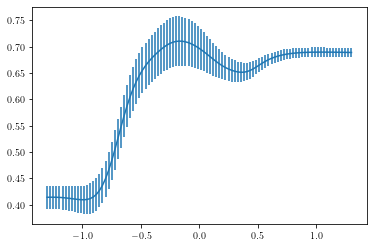

1
2
3
4
5


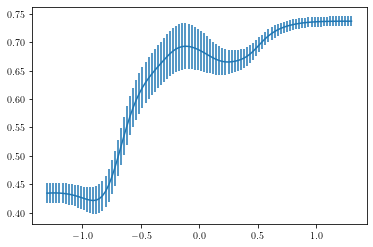

6
7
8
9
10


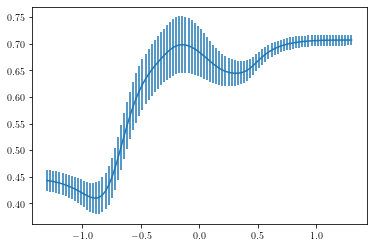

11
12
13
14
15


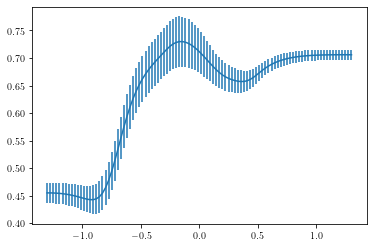

16
17
18
19
20


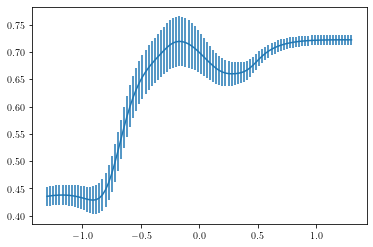

21
22
23
24
25


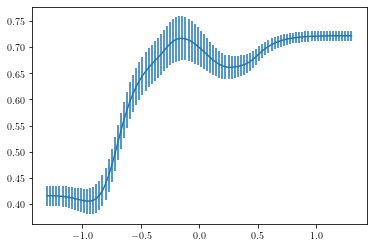

26
27
28
29
30


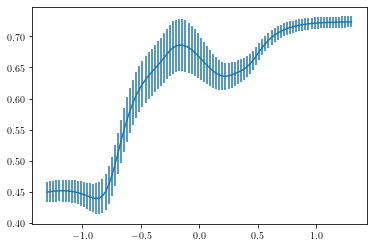

31
32
33
34
35


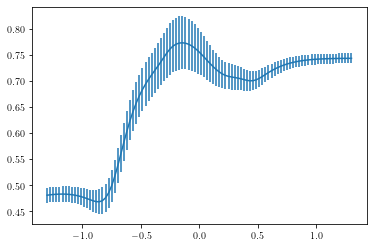

36
37
38
39
40


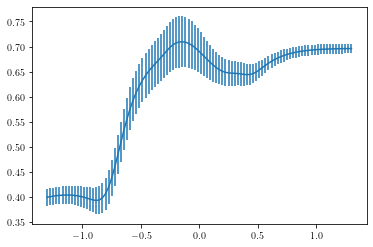

41
42
43
44
45


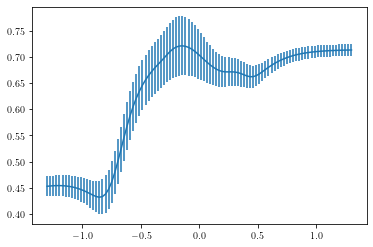

46
47
48
49
50


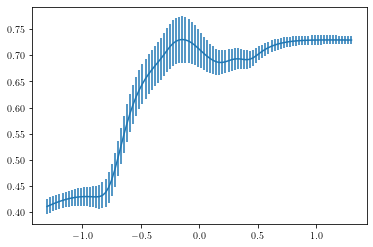

51
52
53
54
55


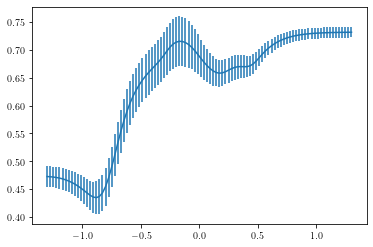

56
57
58
59
60


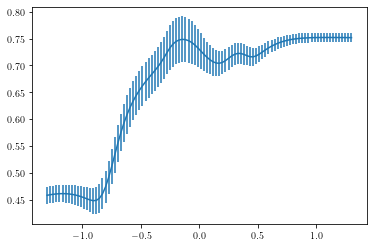

61
62
63
64
65


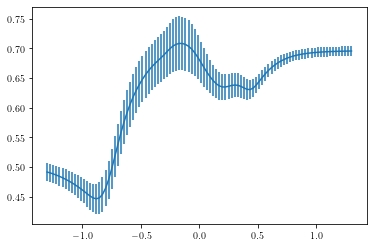

66
67
68
69
70


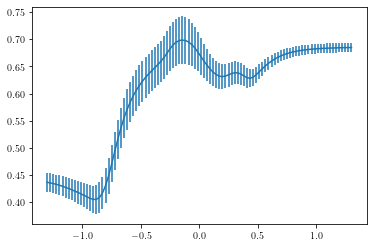

71
72
73
74
75


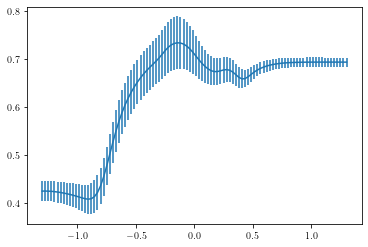

76
77
78
79
80


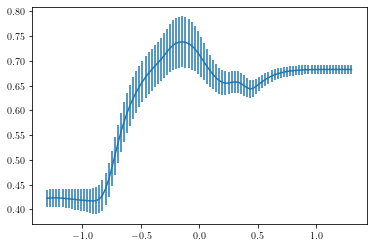

81
82
83
84
85


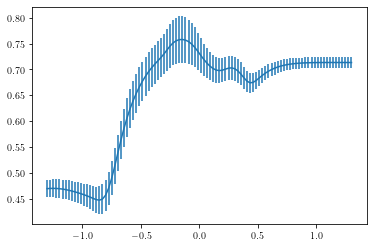

86
87
88
89
90


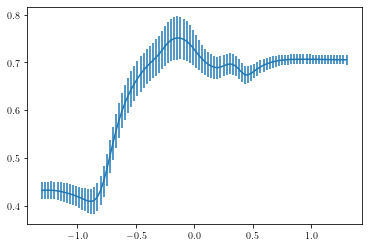

91
92
93
94
95


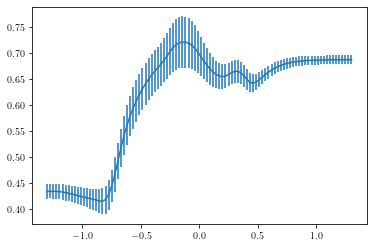

96
97
98
99
100


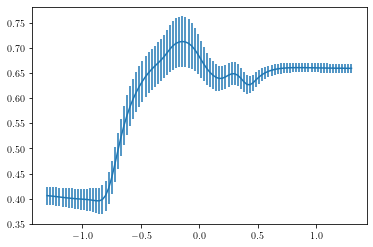

101
102
103
104
105


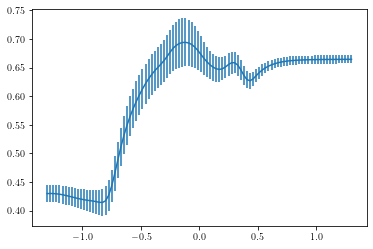

106
107
108
109
110


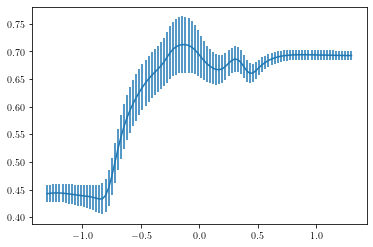

111
112
113
114
115


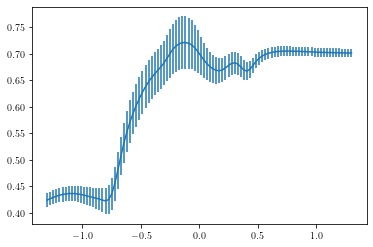

116
117
118
119
120


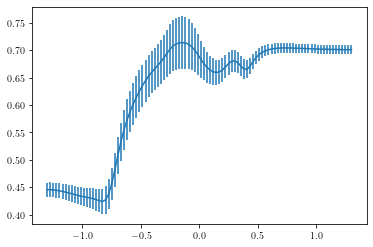

121
122
123
124
125


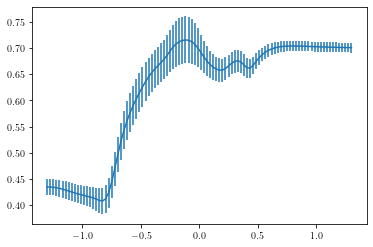

126
127
128
129
130


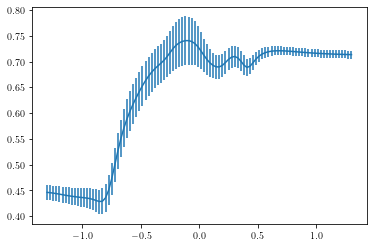

131
132
133
134
135


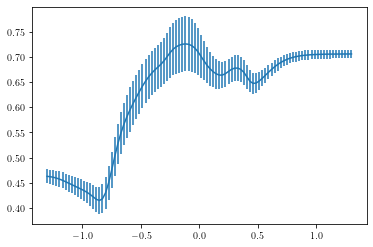

136
137
138
139
140


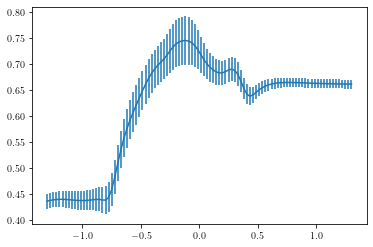

141
142
143
144
145


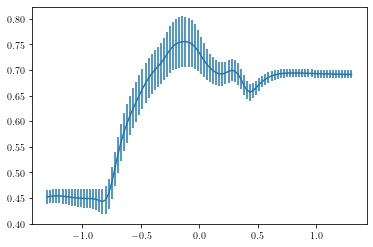

146
147
148
149
150


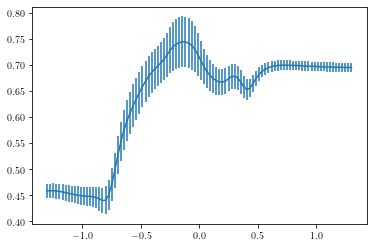

151
152
153
154
155


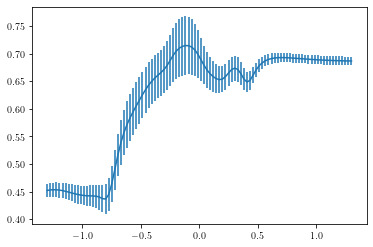

156
157
158
159
160


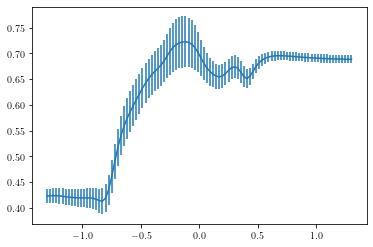

161
162
163
164
165


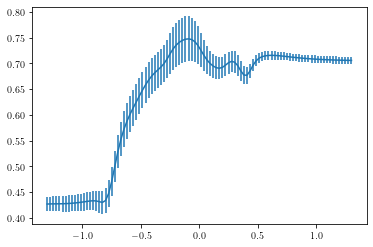

166
167
168
169
170


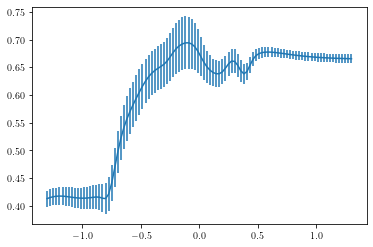

171
172
173
174
175


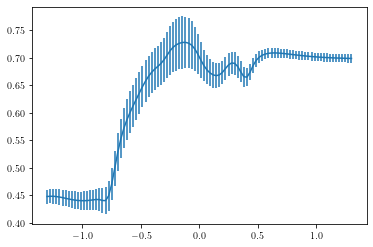

176
177
178
179
180


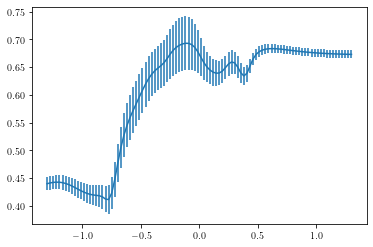

181
182
183
184
185


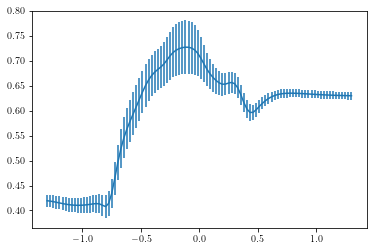

186
187
188
189
190


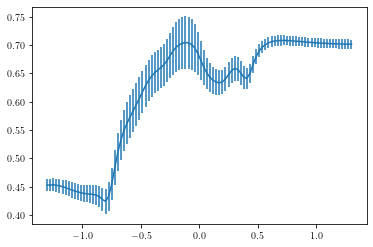

191
192
193
194
195


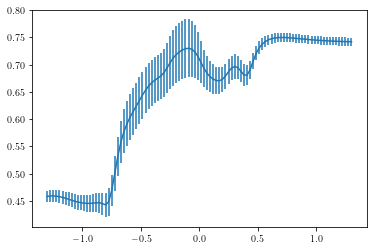

196
197
198
199
200


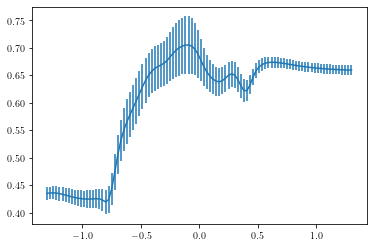

201
202
203
204
205


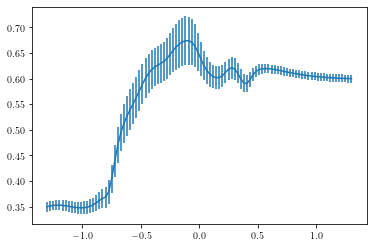

206
207
208
209
210


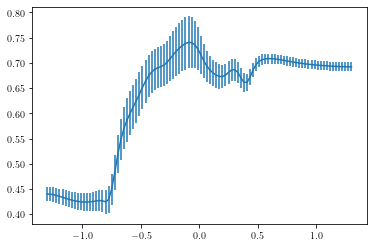

211
212
213
214
215


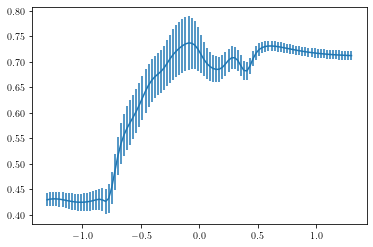

216
217
218
219
220


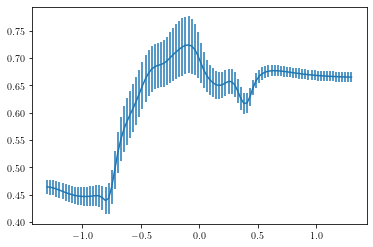

221
222
223
224
225


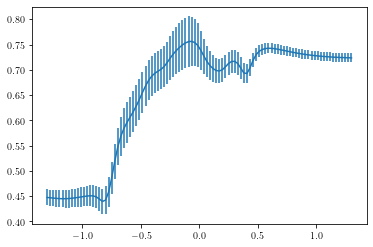

226
227
228
229
230


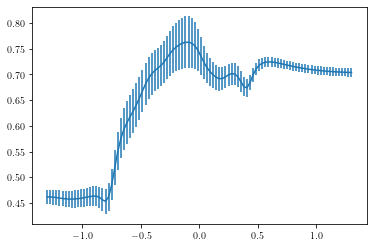

231
232
233
234
235


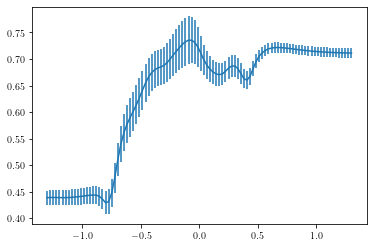

236
237
238
239
240


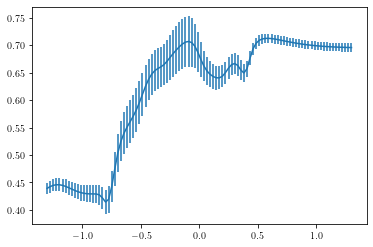

241
242
243
244
245


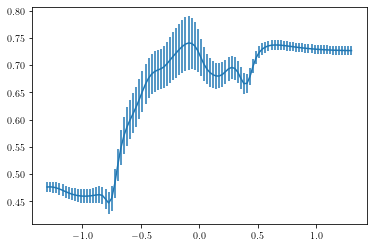

246
247
248
249
250


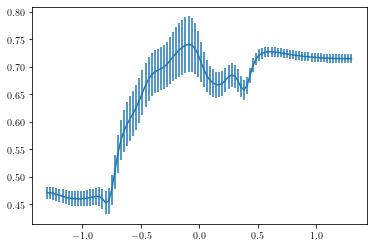

251
252
253
254
255


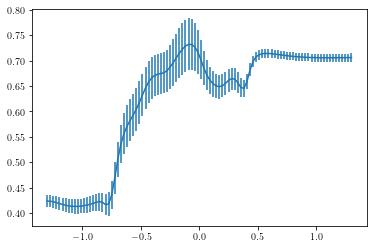

256
257
258
259
260


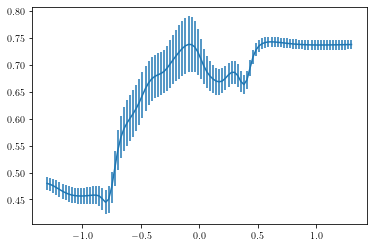

261
262
263
264
265


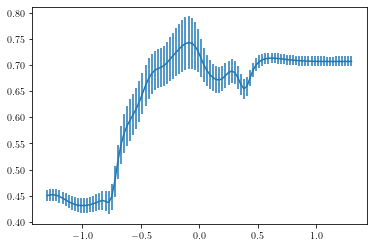

266
267
268
269
270


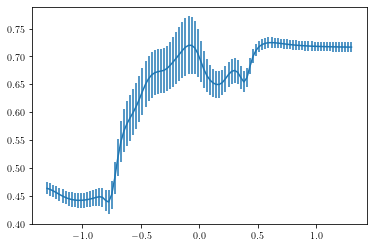

271
272
273
274
275


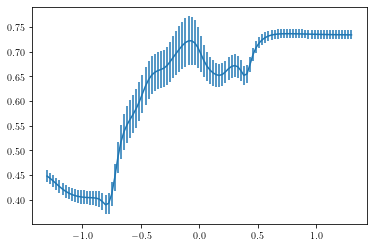

276
277
278
279
280


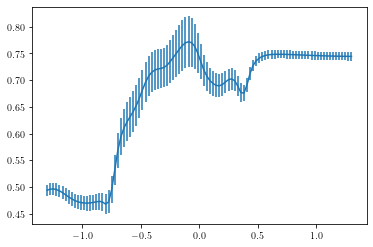

281
282
283
284
285


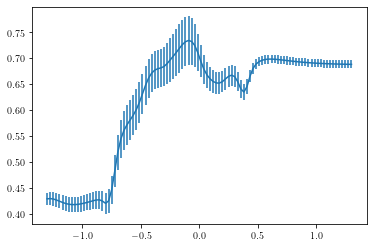

286
287
288
289
290


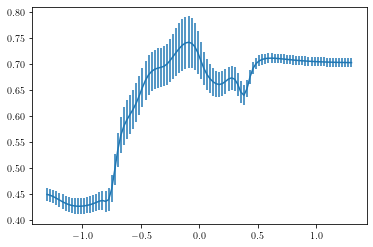

291
292
293
294
295


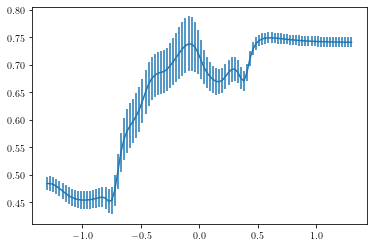

296
297
298
299
300


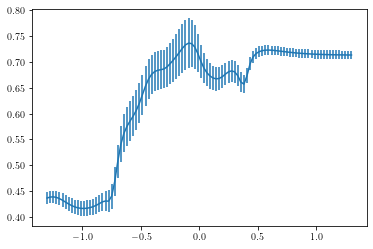

301
302
303
304
305


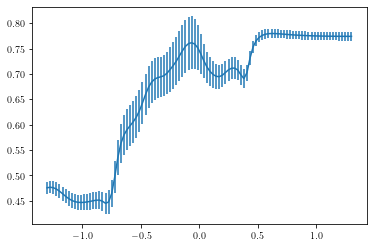

306
307
308
309
310


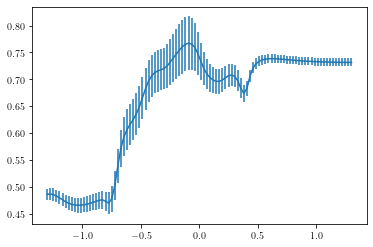

311
312
313
314
315


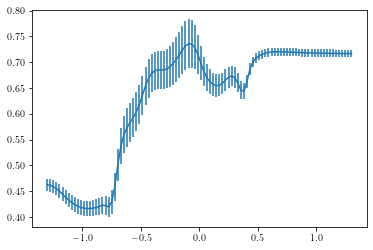

316
317
318
319
320


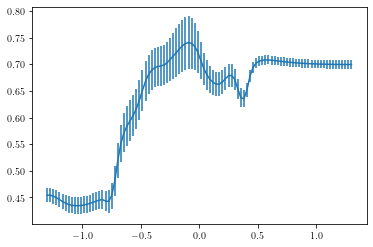

321
322
323
324
325


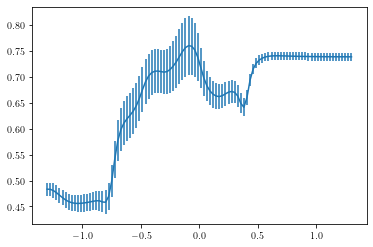

326
327
328
329
330


KeyboardInterrupt: 

In [46]:
for epoch in range(EPOCH):
    if epoch % 1 == 0:
        print(epoch)
    for step, (phi1_dat, dat_vec, dat_cov_avail) in enumerate(loader):
        #net.bool_mask = dat_cov_avail
        mean_phase_space, sigma_phase_space,f = net(phi1_dat)
        #phi2_mean, sig, f = NN_out[:,0].view(-1,1), NN_out[:,1].view(-1,1), NN_out[:,2].view(-1,1)
        cov_predict = torch.zeros(len(phi1_dat),4,4)
        
        for idx in range(len(phi1_dat)):
            cov_predict[idx,:,:] = torch.eye(4)*(sigma_phase_space[idx,:]**2)
        #print(cov_predict)
        loss_val = neg_log_like(phi1_dat,dat_vec,cov_predict, dat_cov_avail,f,mean_phase_space,
                                torch.min(data_torch[:,1:],dim=0)[0].view(-1,1),torch.max(data_torch[:,1:],dim=0)[0].view(-1,1))
        
        optimizer.zero_grad()
        loss_val.backward()         
        optimizer.step()
        net.zero_grad()
        
    if epoch % 5 == 0:
        with torch.no_grad():
            phi1_plot = torch.linspace(-1.3,1.3,100).view(-1,1)
            #net.bool_mask = None
            mean_phase_space, sigma_phase_space,f = net(phi1_plot)
            #phi2_mean, sig, f = NN_out[:,0].view(-1,1), NN_out[:,1].view(-1,1), NN_out[:,2].view(-1,1)
            #loss_val = neg_log_like(phi1_dat,phi2_dat,f,phi2_mean,sig)
            #print(loss_val)
            
            #mean_out, sig_out, pdf_out  = plot_out(phi1_plot)
            dimplot = 0
            plt.errorbar(x=phi1_plot[:,0],y=mean_phase_space[:,dimplot],yerr=sigma_phase_space[:,dimplot]/2)
            plt.show()

        
    

In [63]:
mu_min = torch.min(data_torch[:,1:],dim=0)[0].view(-1,1)
mu_max = torch.max(data_torch[:,1:],dim=0)[0].view(-1,1)
with torch.no_grad():
    phi1_plot = torch.linspace(-2.5,2.5,150).view(-1,1)
    y_axis_plot = torch.linspace(-2.5,1.8,151)
    mean_phase_space, sigma_phase_space,f = net(phi1_plot)
    stream_heatmap = np.zeros((len(phi1_plot),len(y_axis_plot),4))

    for i in range((mean_phase_space.shape[1])):
        for j in range(len(phi1_plot)):
            pdf_val = norm.pdf(x=y_axis_plot,loc=mean_phase_space[j,i],scale=sigma_phase_space[j,i])
            stream_heatmap[j,:,i]= f[j].numpy()*pdf_val/( f[j].numpy()*pdf_val + (1.0-f[j].numpy()*(1./torch.prod(mu_max - mu_min).numpy()) ) )
        #np.random.normal(loc=mean_phase_space[i,:]
#mean_phase_space.shape     

In [69]:
mu_min

tensor([[-1.8320],
        [-0.5743],
        [-2.0423],
        [-1.8371]])

/var/folders/rq/9c89gb15479bjnxrpnmdf_p40000gn/T/ipykernel_75595/632640412.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)


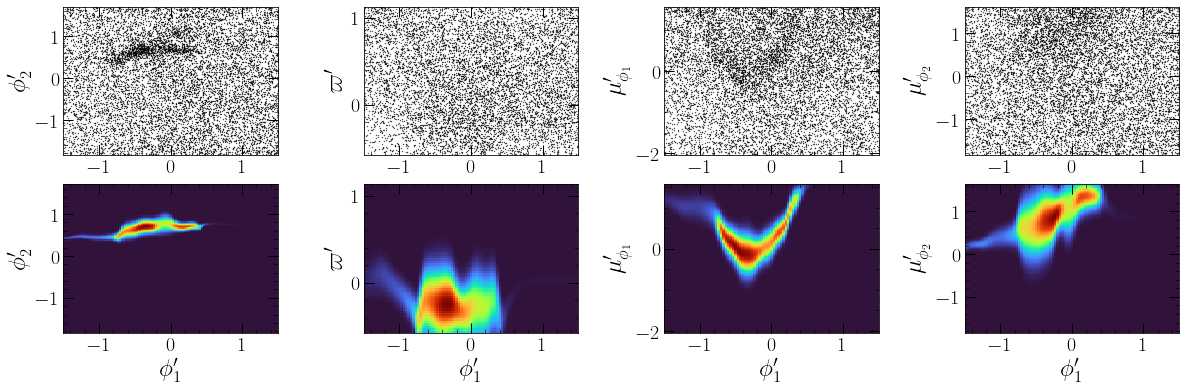

In [66]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,6)
flat_ax = ax.flatten()

# matplotlib ticks
for i in range(len(flat_ax)):
    flat_ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    flat_ax[i].minorticks_on() #Minor
    flat_ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor

for i in range(4):
    ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='k',s=.1)
    #ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='cyan',s=1.)
    ax[0,i].set_xlim(-1.5,1.5)
    ax[0,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)
    ax[1,i].set_xlim(-1.5,1.5)
    ax[1,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    ax[1,i].set_xlabel(r'$\phi^\prime_1$',fontsize=24)
    
ax[0,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)
ax[1,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)

ax[0,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)
ax[1,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)

ax[0,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)
ax[1,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)

#ax[0,3].set_ylabel(r'$v_r^\prime$',fontsize=24)
#ax[1,3].set_ylabel(r'$v_r^\prime$',fontsize=24)

ax[0,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
ax[1,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
fig.subplots_adjust(wspace=.4)
    
#plt.savefig('gd1_density_net.pdf')

In [103]:
from scipy.stats import norm
def plot_out(data_torch):
    mean, sig, frac = net(data_torch[:,0].view(-1,1))
    member_prob = np.zeros_like(data_torch[:,0].view(-1,1).numpy())
    print(frac.shape)
    for i in range(len(mean)):
        member_prob_num = frac[i]*stats.multivariate_normal.pdf(x=data_torch[i,1:].numpy(),mean=mean[i,:].numpy(), cov=np.eye(4)*sig[i,:].numpy())
        member_prob_denom = member_prob_num + (1.-frac[i])*(1./np.prod(mu_min.numpy()*mu_max.numpy()))
        member_prob[i] = member_prob_num/member_prob_denom
    return member_prob
    
with torch.no_grad():
    phi1_plot = data_torch[:,0].view(-1,1)#torch.linspace(-1,1,100).view(-1,1)
    maybe_members = plot_out(data_torch)
    #net_out_at_data = net(data_torch[:,0].view(-1,1))
    #mean_dat, sig_dat, f_dat = net_out_at_data[:,0], net_out_at_data[:,1], net_out_at_data[:,2]
    


torch.Size([11723, 1])


In [104]:
data_torch

tensor([[-1.3281, -1.7343,  0.0000,  0.4023,  0.9229],
        [-1.3384, -1.6336, -0.0856, -0.3228, -1.0297],
        [-1.3326, -1.6157, -0.3850,  1.3381,  1.1372],
        ...,
        [-1.4959, -1.6694,  0.5221,  0.8044,  1.0056],
        [-1.4878, -1.7410, -0.1381, -0.3657,  0.1050],
        [-1.4765, -1.7847,  0.0193, -0.1739, -1.3991]])

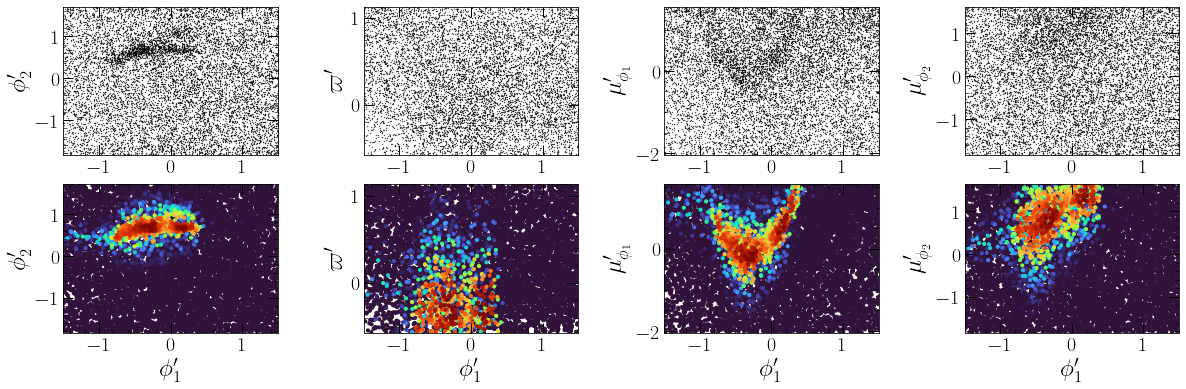

In [113]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,6)
flat_ax = ax.flatten()

# matplotlib ticks
for i in range(len(flat_ax)):
    flat_ax[i].tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    flat_ax[i].minorticks_on() #Minor
    flat_ax[i].tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor

for i in range(4):
    ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='k',s=.1)
    #ax[0,i].scatter(data[:,0],data[:,i+1],rasterized=True,color='cyan',s=1.)
    ax[0,i].set_xlim(-1.5,1.5)
    ax[0,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    inds = np.argsort(maybe_members.flatten())#np.argsort(-maybe_members)
    
    cbar = ax[1,i].scatter(data[inds,0],data[inds,i+1],rasterized=True,c=maybe_members[inds],s=10,cmap=plt.get_cmap('turbo'))
    
    #cbar = ax[1,i].pcolormesh(phi1_plot[:,0].numpy(), y_axis_plot.numpy(),stream_heatmap[:,:,i].T,cmap=plt.get_cmap('turbo'),rasterized=True)
    ax[1,i].set_xlim(-1.5,1.5)
    ax[1,i].set_ylim(np.nanmin(data[:,i+1]),np.nanmax(data[:,i+1]))
    
    ax[1,i].set_xlabel(r'$\phi^\prime_1$',fontsize=24)
    
ax[0,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)
ax[1,0].set_ylabel(r'$\phi^\prime_2$',fontsize=24)

ax[0,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)
ax[1,2].set_ylabel(r'$\mu_{\phi_1}^\prime$',fontsize=24)

ax[0,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)
ax[1,3].set_ylabel(r'$\mu_{\phi_2}^\prime$',fontsize=24)

#ax[0,3].set_ylabel(r'$v_r^\prime$',fontsize=24)
#ax[1,3].set_ylabel(r'$v_r^\prime$',fontsize=24)

ax[0,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
ax[1,1].set_ylabel(r'$\varpi^\prime$',fontsize=24)
fig.subplots_adjust(wspace=.4)
    
##plt.savefig('gd1_density_net_membership.pdf')

In [110]:
np.argsort(maybe_members.flatten())

array([11722,  7477,  7478, ...,  5239,  5184,  6235])

ValueError: x and y must have same first dimension, but have shapes torch.Size([11723, 1]) and (150, 1)

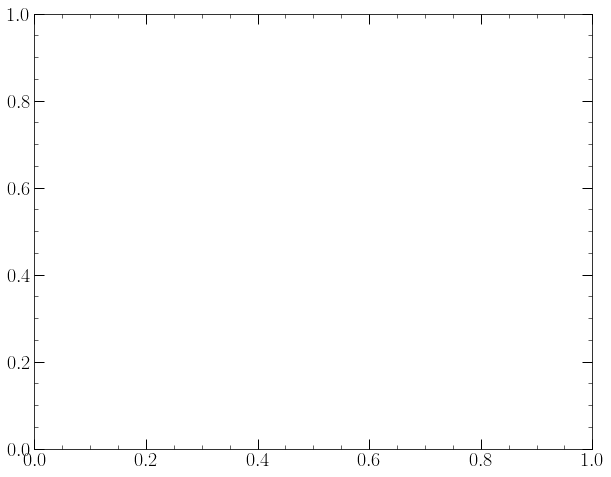

In [83]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

# matplotlib ticks
for i in range(1):
    ax.tick_params(which='major',labelsize = 20,direction='in', length=10, width=1, colors='k',top=True,right=True) #Major
    ax.minorticks_on() #Minor
    ax.tick_params(which='minor',direction='in',top=True,right=True, length=4) #Minor
ax.plot(phi1_plot,f.numpy(),color='k')
ax.set_xlabel(r'$\phi_1$',fontsize=25)
ax.set_ylabel(r'$a_1(\phi_1)$',fontsize=25)
#plt.savefig('gd1_lin_density.pdf',rasterized=True)

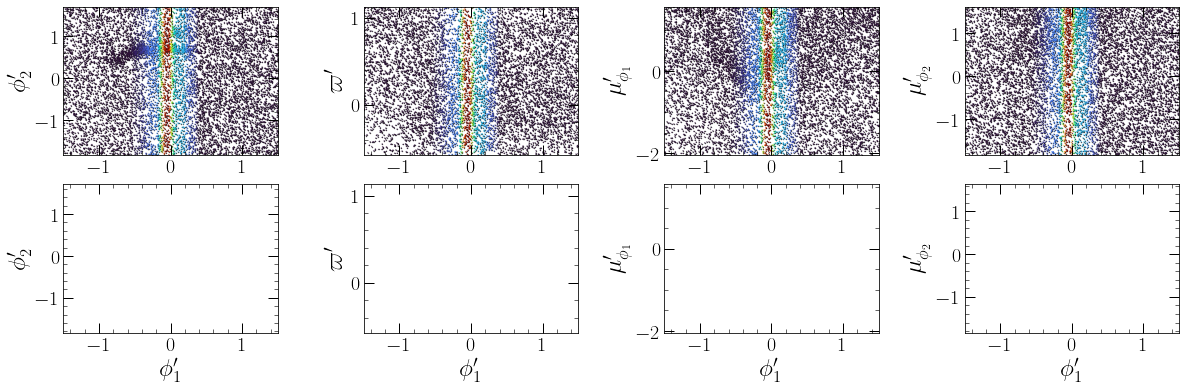